<a href="https://colab.research.google.com/github/JVCarmich0959/CSC228/blob/main/Jacquelyn's_Copy_of_CSC228_Lesson05_First_NeuralNetwork_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Text Classification using Neural Networks
# CNN Neural Network Architecture
# Using Keras wrapper module in Tensorflow
#
# Owner:  Lorrie Tomek
#
# Uses Libraries:  keras, tensorflow
# Runtime:  Google CoLab (cpu)
# 
# Data: 
#
# Reference:  https://realpython.com/python-keras-text-classification/

In [ ]:
# libraries
# import python libraries
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Introduction to Keras
Keras was originally written as a wrapper layer, that could wrap different deep learning and neural network APIs including the lower layer APIs of Tensorflow.  

Keras provides a simpler interface to build a neural network.  Keras was built by François Chollet, who in a book described it as: 

Keras is a model-level library, providing high-level building blocks for developing deep-learning models. It doesn’t handle low-level operations such as tensor (multi-dimensional vector) manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor library to do so, serving as the backend engine of Keras (Source)

Keras is a great way to start experimenting with neural networks without having to implement every layer and piece on your own. For example Tensorflow is a great machine learning library, but you have to implement a lot of boilerplate code to have a model running.

Today, Keras is a module that is part of Tensorflow 2.0

In [ ]:
# Install the keras package (actually not needed as it is preinstalled in Google Colab)
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Choose and Download a Dataset

We will use a dataset from the UCI Machine Learning Repository which has labeled sentences for Sentiment Analysis.

Investigate the UCI Machine Learning Repository at this URL: 
https://archive.ics.uci.edu/

If you have not downloaded this, please do so. 

In [ ]:
# download and rename the zip file
# we can use many unix commands with an exclamation point in front of them in jupyter notebooks
!wget -c "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip" -O sentiment_labelled_sentences.zip

--2023-02-06 17:38:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment_labelled_sentences.zip’

sentiment_labelled_ 100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2023-02-06 17:38:59 (632 KB/s) - ‘sentiment_labelled_sentences.zip’ saved [84188/84188]



In [ ]:
# if you already unzipped the data, comment this out or it will stop and ask 
# if you want to replace. 
# unzip to current directory only, to make it easier to find the .txt files
!unzip -j sentiment_labelled_sentences.zip

Archive:  sentiment_labelled_sentences.zip
  inflating: .DS_Store               
  inflating: ._.DS_Store             
  inflating: amazon_cells_labelled.txt  
  inflating: imdb_labelled.txt       
  inflating: ._imdb_labelled.txt     
  inflating: readme.txt              
  inflating: ._readme.txt            
  inflating: yelp_labelled.txt       
  inflating: ._sentiment labelled sentences  


In [ ]:
!ls -r 

yelp_labelled.txt		  sample_data  imdb_labelled.txt
sentiment_labelled_sentences.zip  readme.txt   amazon_cells_labelled.txt


This code defines a dictionary called 'filepath_dict' with keys 'yelp', 'amazon', and 'imdb' and the respective file paths for each as the values.

The code then creates an empty list 'df_list' which will store pandas dataframes for each of the files.

Using a for loop, it iterates over the items in the 'filepath_dict' dictionary. For each iteration, it:

1. Reads the file at the given path using the 'pd.read_csv' function, where the resulting data is stored in a pandas dataframe 'df'

2. Adds a new column to the 'df' dataframe with the nae "source" and the value of the source (which is the key from the 'filepath_dict')

3. Appends the resulting 'df' dataframe to the 'df_list' list

After looping over al the files, it concatenates the dataframes in 'df_list' into a single dataframe 'df' using the 'pd.concat' function.

Finally, it prints the first row (index 0) of the resulting dataframe using 'df.iloc[0]'.

In [ ]:
# read the data from the 3 labeled .txt files into a python pandas dataframe
# pandas dataframes are similar to excel spreadsheets with rows and columns
filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names = ['sentence', 'label'], sep = '\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


## Split the data into training and testing

The code below is using the 'train_test_split' function from the 'sklearn.model_selection' module in scikit-learn. The function is used to split the data into training and testing sets.

'df_yelp' is a sub-dataframe of 'df' that contains only the rows where the value of the 'sorce' column is equal to 'yelp'. The value of the 'sentence' column in 'df_yelp' are assigned to the 'sentences' variable and the values of the 'label' column are assigned to the 'y' variable.

The 'train_test_split' function then splits the 'sentences' and 'y' arrays into four new arrays: 'sentences_train', 'sentences_test', 'y_train', and 'y_test.' The split is done with a ratio of 75% for the training set and 25% for the testing set(controlled by the 'test_size' parameter). The random state (controlled by the 'random_state'parameter). is set to 1000 to ensure **reproducibility** of the split.

This is important because machine learning models are trained on a training set and evaluated on a testing set. The goal is to train the model on the training set and have it generalize well to new, unseen data represented by the testing set. By randomly splitting the data into training and testing sets, we can ensure that the model is not overfitting, which is when the model has memorized the training data instead of learning to generalize new data.


In [ ]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

## Let's Use BoW to Vectorize our Sentences

The code below is using:
1. 'CountVectorizer' class from the 'sklearn.feature_extraction.text' module to convert text into numerical representations, a process known as vectorization. The vectorized representation of the text data will be used as input for a mahcine learning model.

2. A 'CountVectorizer' object is created and named 'vectorizer'. The 'fit' method is then called on 'vectorizer' with the 'sentences_train' as input. This trains the 'CountVectorizer' object on the training data and creates a vocabulary of words that the vectorizer will use to vectorize the text.

3. The 'transform method is called on the 'sentences_train' and 'sentences_test' to obtain the vectorized representations of the text data. The results are stored in the 'X_train' and 'X_test" arrays, respectively.

'CountVectorizer' is a method commonly used for text vectorization. It counts the number of occurences of each word in a text document and represents each document as a vector of word frequencies.

Other vectorization methods include the **'TfidVectorizer'** which we learned earlier is an alternative to the 'CountVectorizer' that scales down the impact of words that occur frequently across many different documents. Another one we haven't touched on is **word embeddings**, which uses a neural network to learn a dense numerical representation for each word in a vocabulary and represents each document as a dense vector of word embeddings.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

# Sparse Matrix

The result of a sparse matrix from this code means that the vectorized representation of the text data is sstored in a sparse matrix. A sparse matrix is a matrix where most of the elements are zero, and it's stred in a compact format that only stores the non-zero elements.

In text data, it's common to have many words that are not present in a given document, which results in a high proportion of zeros in the word frequency matrix. By using a sparse matrix representation, the memory usage and computation time can be signigicantly reduced compared to a dense matrix representation that scores all the zero elements. This sparse matrix can now be used as input for a machine learning model.

## Let's build our first Keras Neural Network Model

This code creates a simple neural network model using the 'Sequential' class from the 'keras.models' module and the 'layers' module from the 'kera' library. The model consists of two dense layers, also known as fully connected layers.

The first line of the code defines 'input_dim' as the number of features, which is obtained by accessing the second dimension of the 'X_train' array.

The second line creates a new 'Sequential' object, which is a type of model in Keras that allows you to build a linear stack of layers.

The third line adds the first dense layer to the model 'model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))'. The 'layers.Dense' constructor creates a dense laer with 10 units, an input dimension equal to 'input_dim' and a ReLU activation function. The ReLU activation function is commonly used in the hidden layers of neural networks and returns the input if it's positive, otherwise returns zero.

The foruth line adds a second dense layer with 'model.add(laers.Dense(1, activation='sigmoid'))'. This layer has one unit and a sigmoid activation function. The sigmoid activation function is commonly used in the output layer of binary classification models and maps the input to values between 0 and 1, which can be interpreted as a probability.

In this code, theneural network model is built using two dense layers, but other types of layers and more layers could be added to the model to create more complex models. The nuber of units and activation function sin the layers can be adjusted to optimize the performance of the model.


In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential() # start creating the sequential model 

# add one dense layer (don't worry about the 10)
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))

# add a second dense layer
model.add(layers.Dense(1, activation='sigmoid'))

We can see the model architecture using the summary() method.

The total number of trainable parameters is 17,161.

The second layer receives all the inputs from the first layer, and has an additional one value that is output.

The 'model.summary' function in Keras is an important tool for inspecting the architecture of a neural netowrk model. It providews a summary of the model's layers. the number of parameters in each layer, and the overall number of parameters in the model.

By looking at the summary of the model's architecture, you can quickly check the number of layers and the number of parameters in each layer, which can give you an idea of the model's complexity and capacity. This information can help you to identify potential issues such as overfitting, underfitting, and poor generalization performance.

You can also use the summary to check if the input shape of the model matches the expected input shape of your data, and to make sure that the output shape of the model matches the expected number of outputs for your task.

Overall, the 'model.summary()' function is an important tool for understanding and debugging neural network models, and it's a good practice to use it regularly during the model development and training process.

In [ ]:
# We can see the model architecture using the summary() method
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                17150     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Before you can start with the training of the model, you need to configure the learning process. This is done with the .compile() method. The **'compile'** function is used to specify the loss function, optimization algorithm, and metrics to be used during training.

1. **'loss' **: The loss function is used to evaluate how well the model is performing. The'binary_crossentropy' is a loss function used for binary classificatio problems, where the goal is to predict one of two outcomes.

2. **'optimizer'**: The optimization algorithm is used to update the model weights to minimize the loss function. The 'adam' optimizer is a popular choice for many deep learning problems.

3. **'metrics'**: The metrics are used to monitor the performance of the model during training and testing. In this case, the 'accuracy' metric is specified, which is a common metric for evaluating the accuacy of a binary classifier.

Compiling the model is an important step in training a machine learning model as it **sets up the framework for the training process and defines how the model will be updated** based on the data it sees during training.


In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
sentences[:5]

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.'],
      dtype=object)

We train the model using the fit() method.  We choose the number of epochs we want to train for, and provide both the training data, and validation data.  We set the batch size to 10, as that is the number of inputs that will be provided during each epoch.  The use of batches allows very large datasets (ones that cannot be stored in memory) to be used to train models.

We assign the result to history, a variable that collects statistics on the model during the training process.

If you have taken Machine Learning, and learned about hyperparameter tuning, some of the paramters on fit (like epochs) can be tuned as hyperparameters.  An epoch, is a complete iteration through the training data.  Epochs is the number of chances the model gets to determine the correct parameter values.

When you run this cell, notice that the loss decreased and the accuracy increased.

In [ ]:
from keras.backend import clear_session
clear_session()

The above code is being used to clear the internal state of the Keras library. This is useful when you want to start fresh, for example, if you are re-using the same Python session for multiple experiments and you want to ensure that the state of the previous experiment does not interere with the current one.

** Note that calling 'clear_session' will release all GPU memory and reset the internal state of the library, so any existing models and variables will be lost. **

In [ ]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


75/75 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5560 - val_loss: 0.6761 - val_accuracy: 0.6160
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.8093 - val_loss: 0.6321 - val_accuracy: 0.7120
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8813 - val_loss: 0.5801 - val_accuracy: 0.7360
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.9267 - val_loss: 0.5387 - val_accuracy: 0.7640
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.9507 - val_loss: 0.4992 - val_accuracy: 0.7680
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.9653 - val_loss: 0.4766 - val_accuracy: 0.7880
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9760 - val_loss: 0.4578 - val_accuracy: 0.7960
Epoch 8/100
75/75 [======

Above we are training the model using the 'fit' function on the 'model' object to fit the model to the training data 'X_train' and 'y_train'.

* 'epochs': This parameter specifies the number of times the training data will be passed through the model. An epock is a complete iteration over the training data. In this case, the model will be trained for 100 epochs.

* 'verbose': This parameter controls the verbosity mode during training. If 'verbose=True', training progress will be printed to the console. If 'verbose=False', training progress will not be printed.

* 'validation_data': This parameter specifies the validation data('X_test' and 'y_test') that will be used to evaluate the model during trianing. The model's performance on the validation data will be used to monitor overfitting.

* 'batch_size': This parmerter specifies the number of samples per gradient update. In this case, the batch size is set to 10, meaning that the model will be updated after every 10 samples.

The 'fit' function returns a 'History' object, which is stored in the variable 'history'. This object contains information about the training process, such as the training loss, accuracy, and  validation loss and accuracy for each epoch. This information can be used to analyze the performance of the model and fine-tune its hyperparameters.

In [ ]:
history

## Evaluate Accuracy of the Model

We use the evaluate() method to test the model.  We can test the training data, and the test data.

The 'evaluate' function is used to calculate the loss and accuracy of the model on the training data( 'X_train' and 'y_train') and testing data ('X_test' and 'y_test'). The performance of the model is calculated by comparing the model's predictions on the data with the true labels.

The results of the evaluation are stored in the variables 'loss' and 'accuracy', which are then printed to the console. The accuracy of the model on the training data and testing data is printed, providing an estimate of how well the model will generalize to new, unseen data.

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7920


## Visualize the Loss and Accuracy of Training and Testing

To make your life easier, you can use this little helper function to visualize the loss and accuracy for the training and testing data based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method. In this case, we are only interested in the accuracy. This helper function employs the matplotlib plotting library:

In [ ]:
# We can see the information kept in history from model training 
# has the following keys for each epoch
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We use the plot_history function to see the overfitting.  Although additional training improved the accuracy of the training data, after some time it decreased the accuracy on the testing data.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

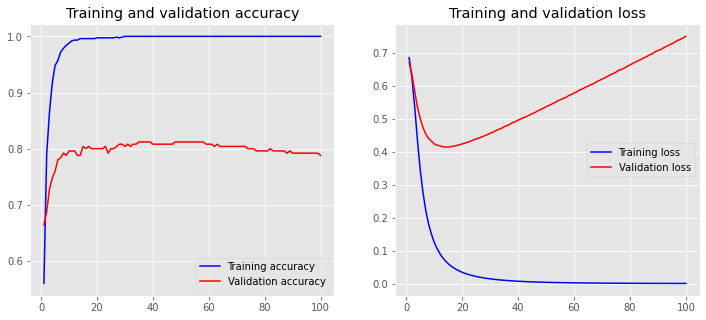

In [ ]:
plot_history(history)

## Experiment with Model

In [ ]:
def tryit(utterance):
  # transform our utterance as we did both the train and test set
  vect = vectorizer.transform([utterance])
  print(model.predict(vect)[0])

In [ ]:
tryit("I hate tomatoes")

1/1 [==============================] - 0s 93ms/step
[0.57481253]


In [ ]:
tryit("I love ice cream")

1/1 [==============================] - 0s 41ms/step
[0.99989456]
